In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

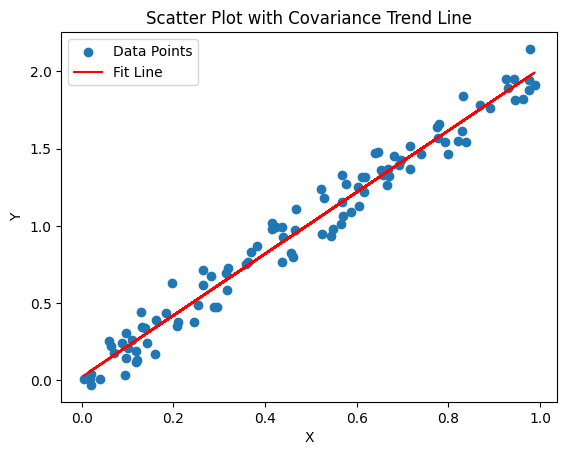

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータの作成
np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)

# 散布図の作成
plt.scatter(x, y, label='Data Points')

# 回帰直線の計算と描画
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', label='Fit Line')

# グラフの装飾
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Covariance Trend Line')
plt.legend()

# 表示
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
def kesson_table(df):
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns


kesson_table(test)

,欠損数,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665


In [ ]:
kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Embarked"] = train["Embarked"].fillna("S")


kesson_table(train)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
test.Fare[152] = test.Fare.median()
test.head(10)

In [ ]:

# scikit-learnのインポートをします
from sklearn import tree


In [ ]:
# 「train」の目的変数と説明変数の値を取得
target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# 「test」の説明変数の値を取得
test_features = test[["Pclass", "Sex", "Age", "Fare"]].values

# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(test_features)

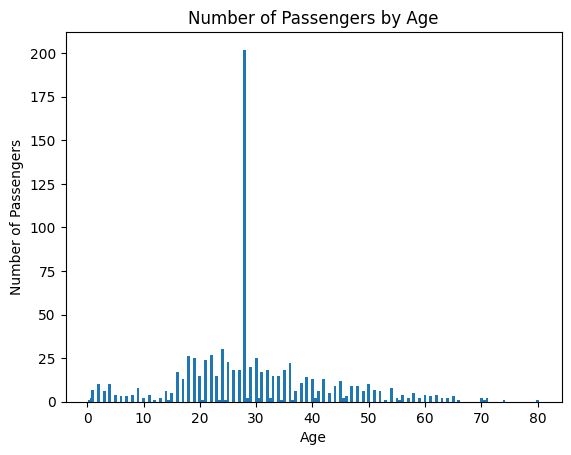

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.DataFrame(train)

# 性別ごとにデータを分割
male_data = df[df['Sex'] == 'male']
female_data = df[df['Sex'] == 'female']

# データから欠損値を除外　平均なのか？除外なのか？中央値なのか？
cleaned_df = df.dropna(subset=['Age'])

# 年齢ごとの人数をヒストグラムで計算
age_counts = cleaned_df['Age'].value_counts().sort_index()

# ヒストグラムをプロット
plt.bar(age_counts.index, age_counts.values, width=0.5, align='center')

# グラフにタイトルとラベルを追加
plt.title('Number of Passengers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

# グラフを表示
plt.show()



In [ ]:
#回帰分析、最小二乗法
#席の位置での生存率
#予測を立てていくのが機械学習

In [ ]:
import numpy as np

# 年齢と運賃のデータをリストにします
ages = [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 31, 30, 34, 15]
fares = [7.25, 71.2833, 7.925, 53.1, 8.05, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542, 16, 29.125, 13, 18, 8.05, 7.225]

# 相関係数を計算します
correlation_coefficient = np.corrcoef(ages, fares)[0, 1]

print(f"年齢と運賃の相関係数: {correlation_coefficient}")

年齢と運賃の相関係数: 0.32012434807207046


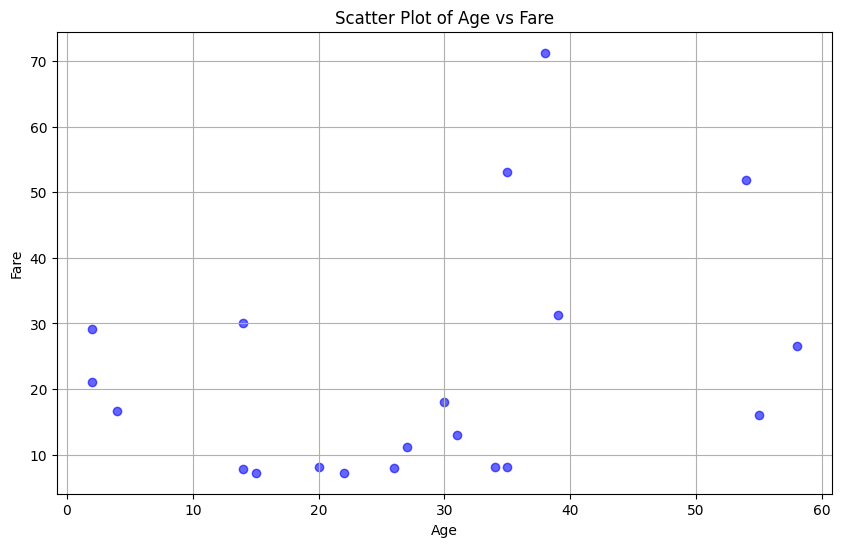

In [ ]:
import matplotlib.pyplot as plt

# 年齢と運賃のデータをリストにします
ages = [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 31, 30, 34, 15]
fares = [7.25, 71.2833, 7.925, 53.1, 8.05, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275, 7.8542, 16, 29.125, 13, 18, 8.05, 7.225]

# 散布図を作成します
plt.figure(figsize=(10, 6))
plt.scatter(ages, fares, color='blue', alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()
